# 의사결정나무
주어진 입력값들의 조합에 대한 의사결정규칙에 따라 출력값을 예측하는 모형. 트리구조의 그래프로 표현
분류, 회귀에 사용
* 분류나무- 출력변수가 범주형
* 회귀나무- 출력변수가 연속형

배깅, 랜포, 부스팅같은 앙상블 모형의 기저모형으로 활용된다.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt   # package for plotting

In [3]:
#라이브러리 로딩
from sklearn.datasets import load_iris # 아이리스 품종 분류 데이터
from sklearn.tree import DecisionTreeClassifier as DT, plot_tree
plt.rcParams['axes.unicode_minus'] = False       # 마이너스 부호 깨짐 현상 
plt.rcParams["font.family"] = 'NanumBarunGothic' # 한글폰트 전역 설정

In [4]:
#데이터 로드 및 분할
data = load_iris()
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data.data, data.target, random_state=0)

In [5]:
#의사결정나무 적합
clf0 = DT(max_depth=3, random_state=0)
clf0.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


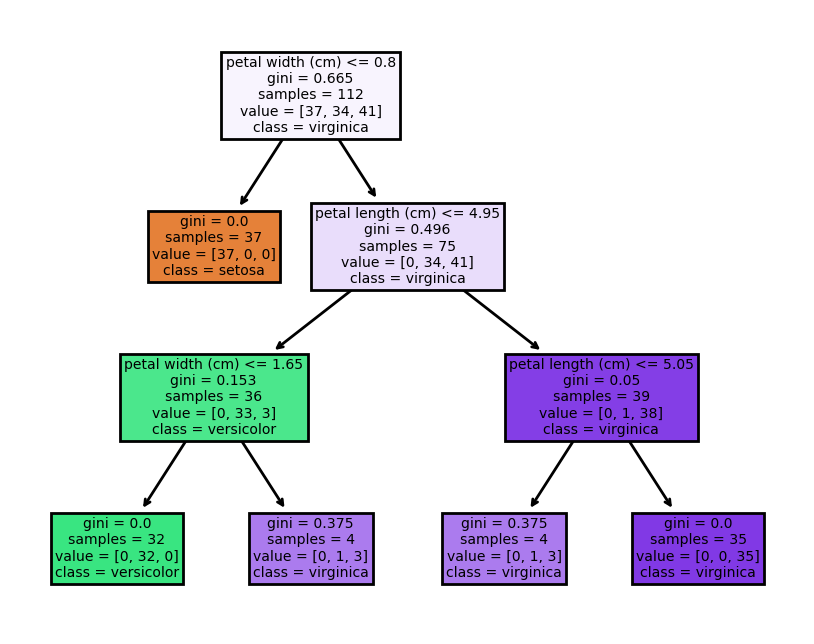

In [6]:
#의사결정나무 모형 시각화
plt.figure(figsize=(5,4), dpi=200)
plot_tree(clf0, 
         feature_names = data.feature_names,#["꽃받침길이", "꽃받침폭",  "꽃잎길이", "꽃잎폭" ], 
         class_names=data.target_names,
          filled=True)
plt.show()

In [7]:
from sklearn.tree import export_text
r = export_text(clf0, feature_names = data['feature_names'])
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal length (cm) <= 4.95
|   |   |--- petal width (cm) <= 1.65
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.65
|   |   |   |--- class: 2
|   |--- petal length (cm) >  4.95
|   |   |--- petal length (cm) <= 5.05
|   |   |   |--- class: 2
|   |   |--- petal length (cm) >  5.05
|   |   |   |--- class: 2



## 유방암데이터

In [8]:
#1.라이브러리 로딩
import pandas as pd
import matplotlib.pyplot as plt   # package for plotting
from sklearn.datasets import load_breast_cancer # 유방암데이터
from sklearn.tree import DecisionTreeClassifier as DT, plot_tree
plt.rcParams['axes.unicode_minus'] = False       # 마이너스 부호 깨짐 현상 
plt.rcParams["font.family"] = 'NanumBarunGothic' # 한글폰트 전역 설정

In [9]:
#2.데이터 로드 및 분할
data = load_breast_cancer()
print("Data dimension:", data.data.shape)
X_tr, X_te, y_tr, y_te = train_test_split(data.data, data.target, test_size=0.3, random_state=0)
print("Train Data:", X_tr.shape, "Test Data:", X_te.shape)

Data dimension: (569, 30)
Train Data: (398, 30) Test Data: (171, 30)


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


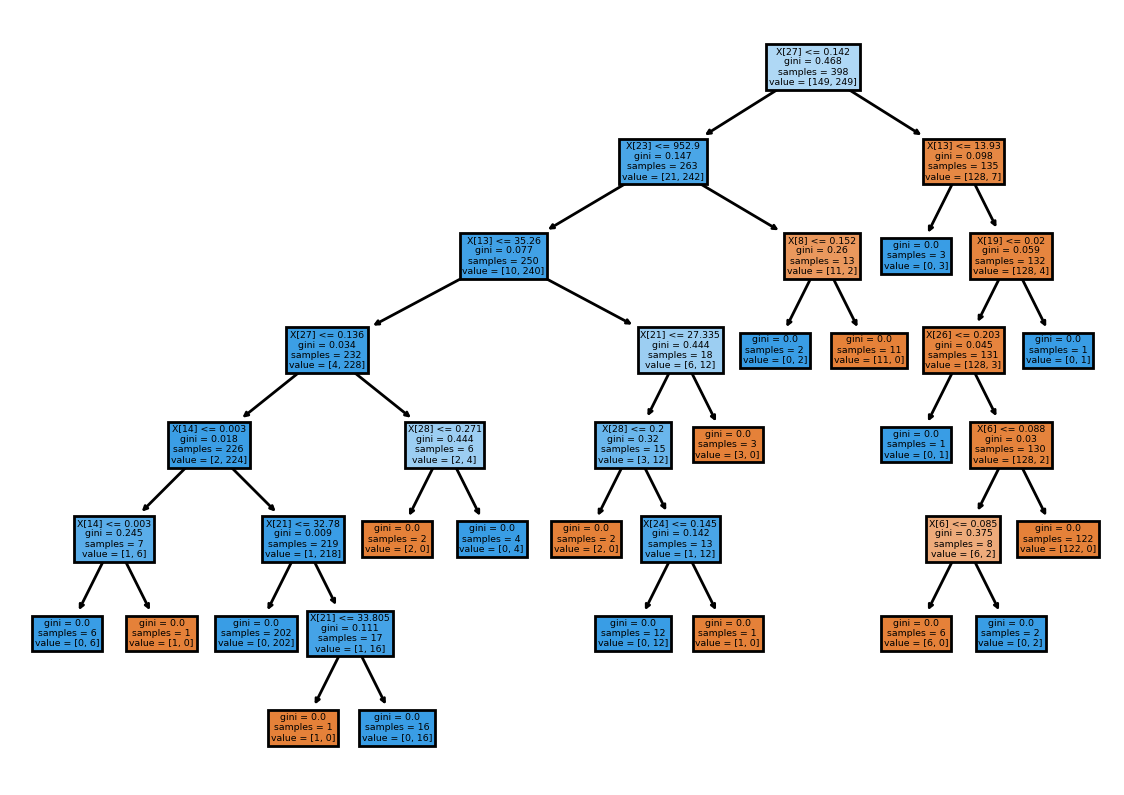

In [10]:
#3.의사결정나무 적합
clf = DT(random_state=0)
clf = clf.fit(X_tr, y_tr)
plt.figure(figsize=(7,5), dpi=200)
plot_tree(clf, filled=True)
plt.show()

이거 아무리해도 업뎃이 안돼서 그냥 포기함ㅅㄱ